# CLASSIFIY IMAGES (CIFAR-10) USING CNNS

### STEP 0: PROBLEM STATEMENT
CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
  * Airplanes
  * Cars
  * Birds
  * Cats
  * Deers
  * Dogs
  * Frogs
  * Horses
  * Ships
  * Strucks
 The Dataset stans for the Canadian Institute For Advancced Research (CIFAR)
 CIFA-10 is widely used for machine learning and computer applications.
 Images: 60000 images, 32X32 color  images, 6000 images for each class, low resolution
 Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

### STEP 1: IMPORT DATASETS AND LIBRARIES

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [4]:
#import datasets
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

### STEP 2: VISUALIZE DATA

[1]


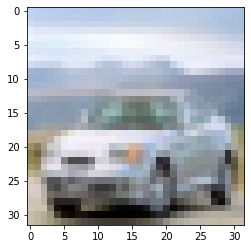

In [9]:
i = 49998
plt.imshow(X_train[i])
print(y_train[i])

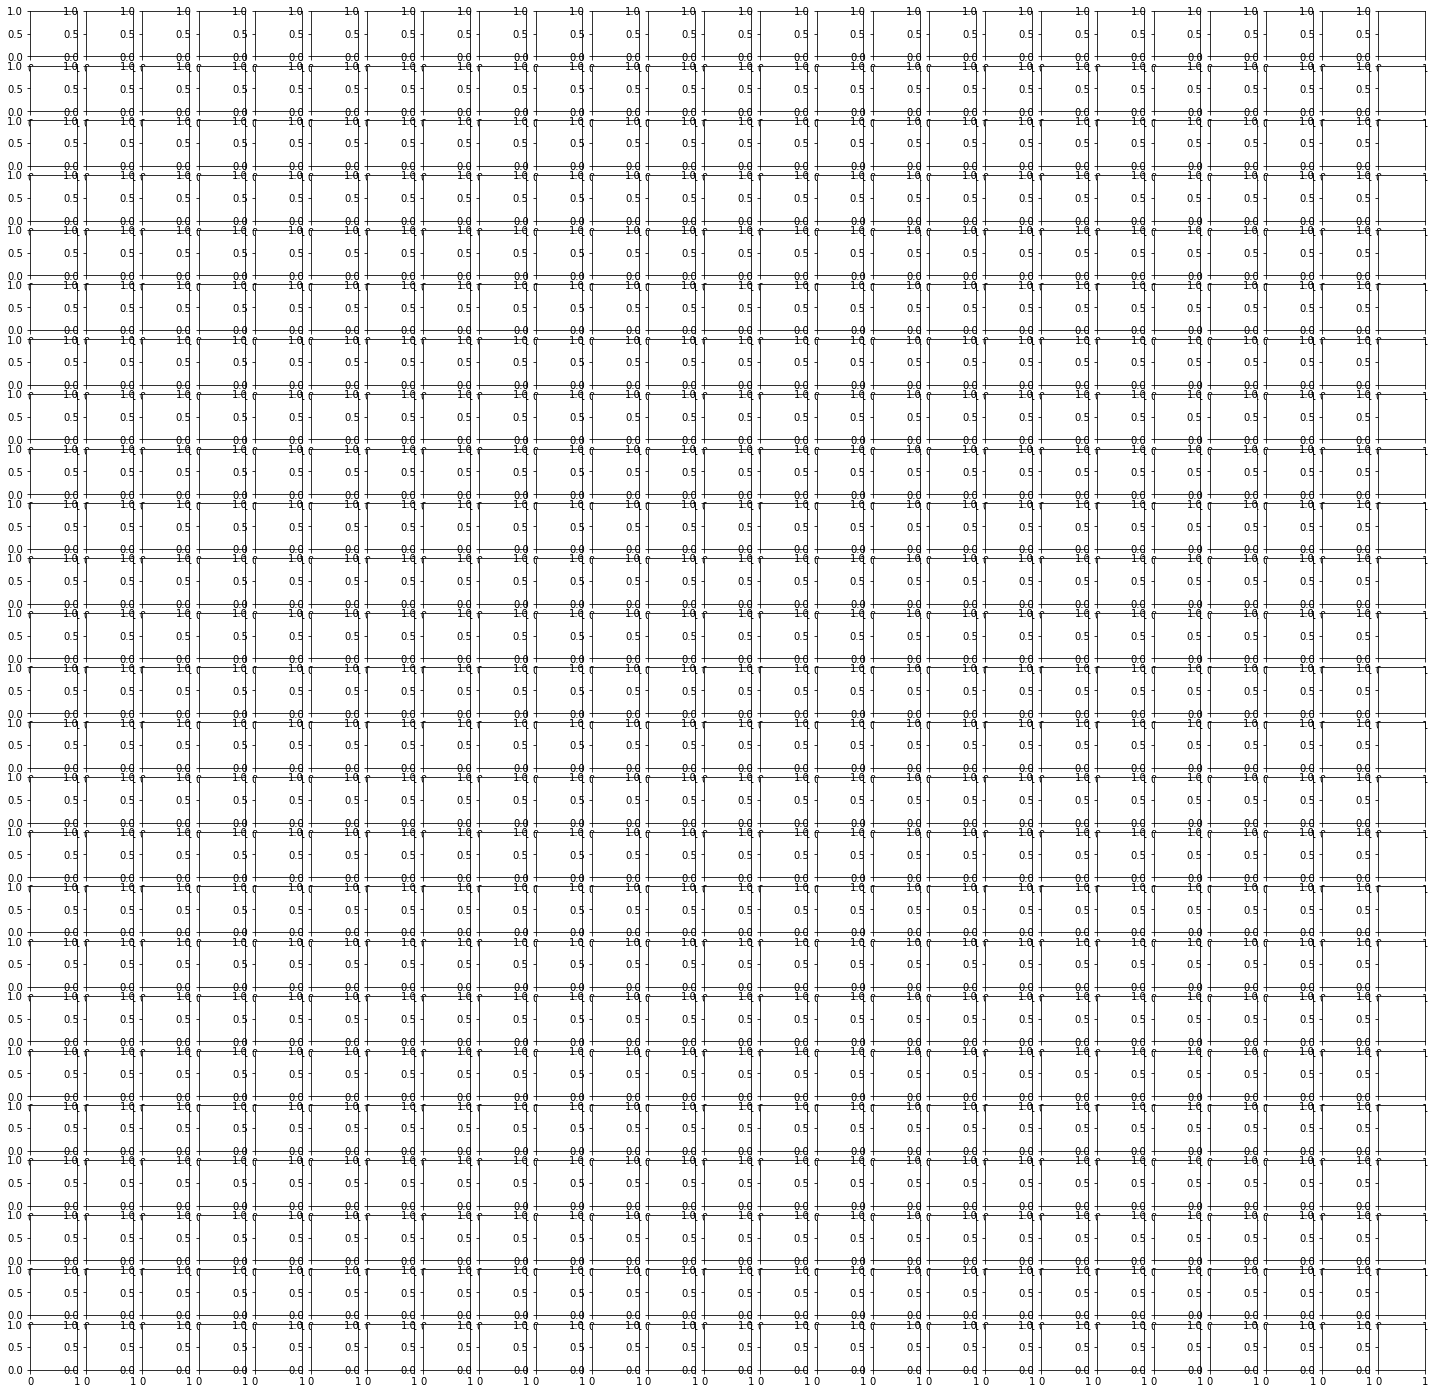

In [10]:
#print many images
W_grid = 25
L_grid = 25

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)

In [11]:
n_training

50000

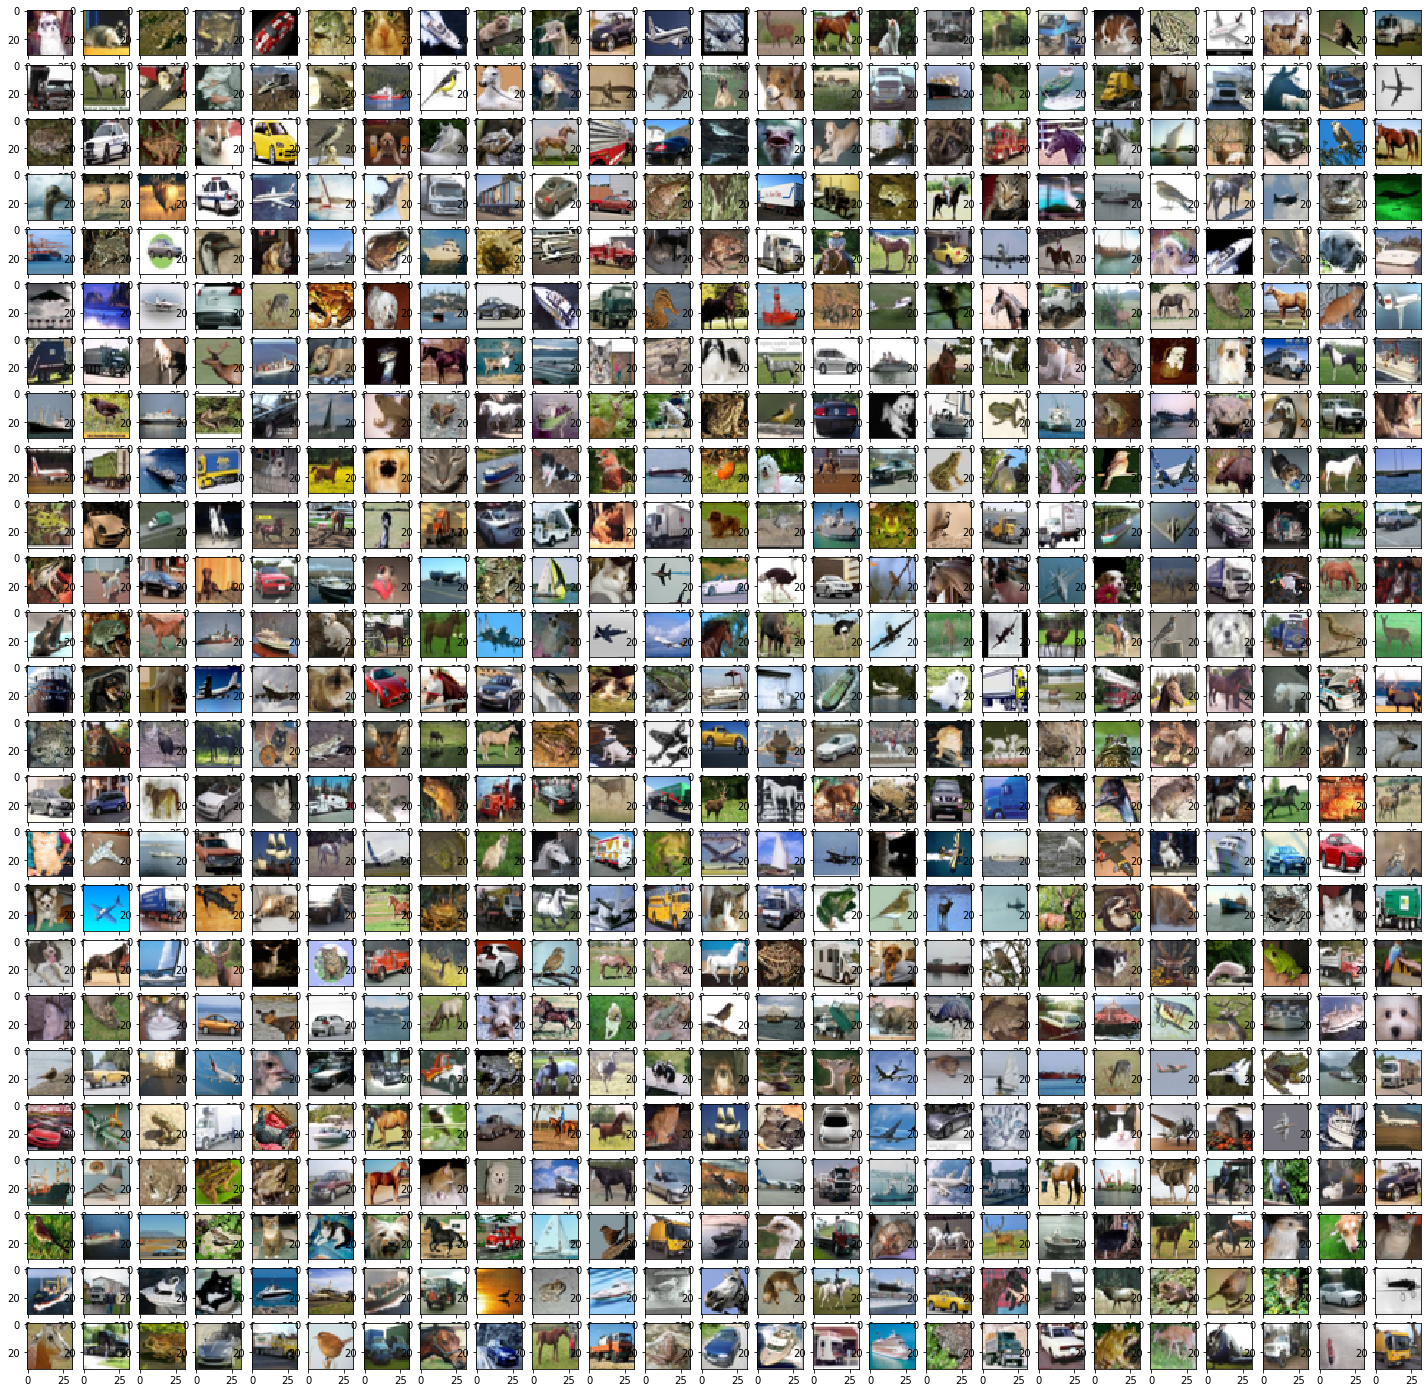

In [12]:
W_grid = 25
L_grid = 25

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    #axes[i]

/Users/hoangvo/anaconda3/envs/deep-learning/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


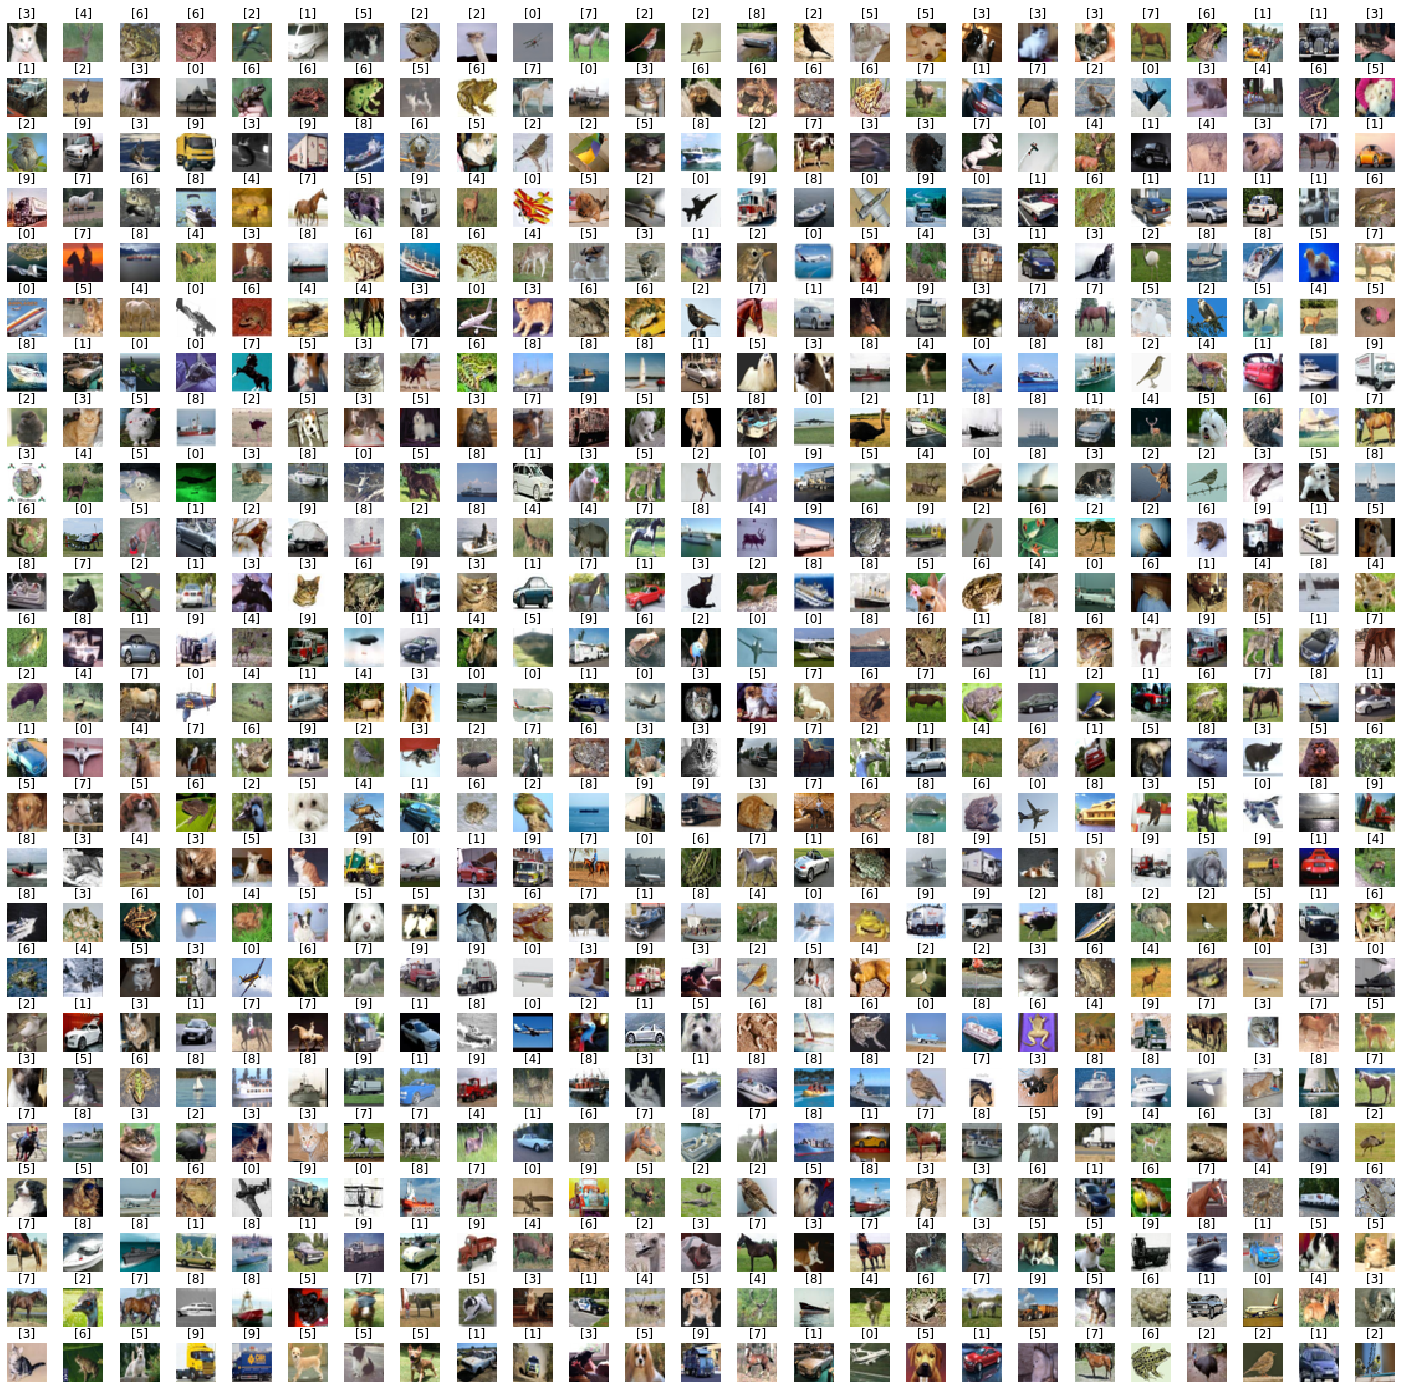

In [13]:
W_grid = 25
L_grid = 25

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training)#PICK A RANDOM NUMBER
    axes[i].imshow(X_train[index])
    #add label on images
    axes[i].set_title(y_train[index])
    #remove the axis information
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

### STEP 3: DATA PREPARATION

In [14]:
#change images into float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [15]:
number_cat = 10

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
import keras

In [18]:
#to hot-code the y_train into categorical values
y_train = keras.utils.to_categorical(y_train, number_cat)

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [21]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [22]:
#normalize values
X_train = X_train/255
X_test = X_test/255

In [23]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [24]:
X_train.shape

(50000, 32, 32, 3)

In [25]:
Input_shape = X_train.shape[1:]

In [26]:
Input_shape

(32, 32, 3)

### STEP 4: TRAIN THE MODEL

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [29]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters =32, kernel_size= (3, 3), activation='relu', input_shape = Input_shape))

#filters=32: numbers of filter
#(3, 3): size of kernel
#Input_shape= (32, 32, 3) # 3=> depth of kernel =3 
cnn_model.add(Conv2D(filters =32, kernel_size = (3, 3), activation='relu'))
#cnn_model.add(Conv2D(filters =128, kernel_size = (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters =64, kernel_size= (3, 3), activation='relu'))
cnn_model.add(Conv2D(filters =64, kernel_size = (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation='relu'))
cnn_model.add(Dense(units = 1024, activation='relu'))

cnn_model.add(Dense(units= 10, activation= 'softmax'))#for the output from 0 o 1, softmax is a good choice

In [30]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop( lr = 0.001), metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

#use shuffle = True to make sure that the network is independent from order of the images

Epoch 1/2


### STEP 5: EVALUATE THE MODEL

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(evaluation[1]))

In [ ]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

In [ ]:
y_test

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
L = 7
W = 7
fig, axes = plt.subplot(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_clases[i], y_test[i]))
    axes[i].axis('off')
    
    
plt.subplot_adjust(wspace= 1)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_test, predicted_classes)
cm

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

### STEP 6: SAVE MODEL

In [ ]:
import os
directory = os.path.join(os.getcwd(), 'save_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

### STEP 7: IMPROVING THE MODEL WITH DATA AUGMENTATION

#### STEP 7.1: DATA AUGMENTATION FOR CIFAR-10 DATASET

In [ ]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

In [ ]:
n = 8
X_train_sample = X_train[:n]

In [ ]:
X_train_sample.shape

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 90)

#dataget_train = ImageDataGenerator(verical_flip=True)
#dataget_train = ImageDataGenerator(height_shift_range=0.5)
#dataget_train = ImageDataGenerator(brightness_range =(1,3))

dataget_train.fit(X_train_sample)

In [ ]:
from scipy.misc import toimage

fig - plt.figure(figsize = (20, 2))
for x_batch in dataget_train.flow(X_train_sample, batch_szie = n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(toimage(x_batch[i]))
        
    fig.subtitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break;

#### STEP 7.2: MODEL TRAINING USING AUGMENTED DATASET

In [ ]:
#if we do this step, then we do not need to do 7.1
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                              rotation_range = 90,
                              width_shift_range= 0.1,
                              horizontal_flip = True,
                              vertical_flip = True)

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size= 32), epochs = 2)

In [ ]:
score = cnn.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
#save model
import os
directory = os.path.join(os.getcwd(), 'save_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, 'keras_cifar10_trained_model_aug.h5')
cnn_model.save(model_path)